In [1]:
import sys
sys.path.append('../src')

In [2]:
from imports.TactileBag import TactileBag

tbag = TactileBag('../data/bags/data2/')
tbag.params

{'path': '/home/hussain/me/projects/tactile/data/bags/data2',
 'possible_angles': [0.017453292519943295,
  0.03490658503988659,
  0.05235987755982989,
  0.06981317007977318,
  0.08726646259971647,
  0.10471975511965978,
  0.12217304763960307,
  0.13962634015954636,
  0.15707963267948966,
  0.17453292519943295],
 'N_examples': 20,
 'theta': 'full',
 'N_iters': 12,
 'z_thresh': -0.0037,
 'min_z': -0.015,
 'max_z': 0.035}

In [3]:
df = tbag.parsed_bag
df

,ts,contact_status,contact_case,contact_angle_x,contact_angle_y,contact_angle_z
0,1672235485049392995,False,0.0,0.001636,0.000830,0.002355
1,1672235485086052833,False,0.0,0.001678,0.000865,0.002270
2,1672235485103664372,False,0.0,0.001699,0.000899,0.002283
3,1672235485131136692,False,0.0,0.001646,0.000848,0.002319
4,1672235485148841329,False,0.0,0.001657,0.000877,0.002295
...,...,...,...,...,...,...
508727,1672246958274827871,False,0.0,0.176380,0.000774,0.002480
508728,1672246958290677711,False,0.0,0.176479,0.000865,0.002503
508729,1672246958303181902,False,0.0,0.176448,0.000805,0.002490
508730,1672246958333194754,False,0.0,0.176357,0.000800,0.002475


In [6]:
import pandas as pd

img_ts = pd.read_csv('/media/hussain/drive1/giant_tactile/timestamps.txt', names=['ts'])['ts'].values*1e9
img_ts

array([1.67223548e+18, 1.67223549e+18, 1.67223549e+18, ...,
       1.67224702e+18, 1.67224703e+18, 1.67224703e+18])

In [4]:
from pathlib import Path

imgs = sorted(Path('/media/hussain/drive1/giant_tactile/').glob('frame_*.png'))

In [5]:
from imports.ExtractContactCases import ExtractContactCases

ex = ExtractContactCases('../data/bags/data2', '../data/extractions/contact_extraction4/')
ex.parse_bag()

extracting contact timestamps:   0%|          | 0/508732 [00:00<?, ?it/s]

In [7]:
len(ex.cases)

2292

In [7]:
import numpy as np
img_idx = []
for case_ts in ex.cases_ts:
    img_ts_idx = np.searchsorted(img_ts, case_ts[0])
    img_idx.append(img_ts_idx)

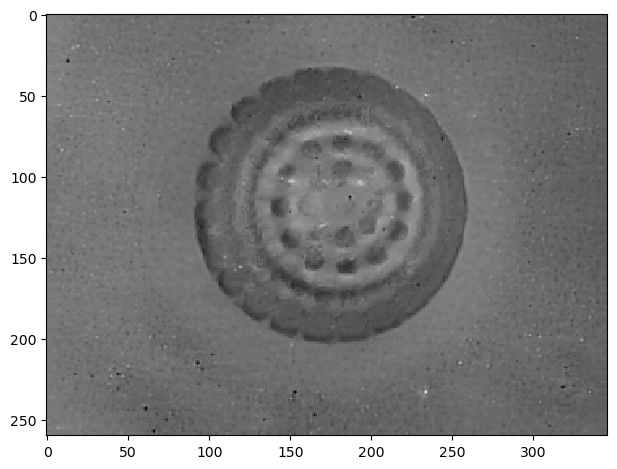

In [8]:
from skimage.io import imread, imshow

img = imread(imgs[img_idx[6]])
imshow(img)

In [10]:
img_idx[-1]

5946